In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('static/resources/airbnb_fall_full.csv')
df.head()

,id,price,room_type,accommodates,longitude,latitude,property_type,availability_90,minimum_nights,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,bathrooms,license,host_name,listing_url,beds,bedrooms,neighbourhood_cleansed
0,29967,225,Entire home/apt,8,-117.25760,32.80751,Entire bungalow,6,4,5,...,4.91,4.80,4.76,2.0,No License,Michael,https://www.airbnb.com/rooms/29967,3,2,Pacific Beach
1,38245,113,Private room,1,-117.21931,32.74217,Private room in home,54,1,3,...,4.79,4.61,4.40,1.0,No License,Melinda,https://www.airbnb.com/rooms/38245,1,1,Roseville
2,108349,258,Entire home/apt,7,-117.25416,32.79783,Entire townhouse,0,6,2,...,4.81,4.89,4.69,2.5,No License,Juliana,https://www.airbnb.com/rooms/108349,5,3,Pacific Beach
3,126344,336,Entire home/apt,8,-117.25728,32.80751,Entire home,44,6,2,...,4.81,4.78,4.65,2.0,No License,Juliana,https://www.airbnb.com/rooms/126344,6,3,Pacific Beach
4,54001,333,Entire home/apt,3,-117.26856,32.81301,Entire guesthouse,42,5,2,...,4.98,4.97,4.89,1.0,No License,Marsha,https://www.airbnb.com/rooms/54001,3,2,La Jolla


In [24]:
avg_prices_by_acc = df.price.groupby(df['accommodates']).mean()
acc_counts = df.accommodates.value_counts()

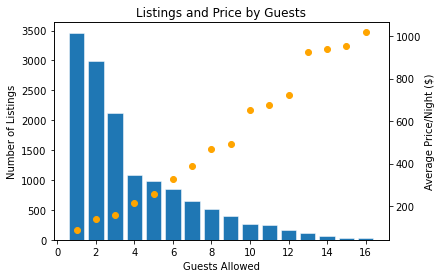

In [26]:
fig, ax1 = plt.subplots()
ax1.bar(range(1,17), acc_counts, linewidth=0.5, edgecolor="white")
ax1.set_title('Listings and Price by Guests')
ax1.set_xlabel('Guests Allowed')
ax1.set_ylabel('Number of Listings')

ax2 = ax1.twinx()
ax2.scatter(range(1,17), avg_prices_by_acc, color='orange')
ax2.set_ylabel('Average Price/Night ($)')
plt.show()

In [35]:
price_type = df.price.groupby(df['room_type']).mean()
rooms = df.room_type.unique()
listing_type = df.price.groupby(df['room_type']).count()
acc_type = df.accommodates.groupby(df['room_type']).mean()
review_type = df.review_scores_rating.groupby(df['room_type']).mean()

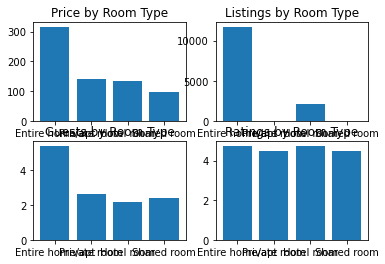

In [39]:
fig, ax = plt.subplots(2, 2)

ax[0,0].bar(rooms, price_type)
ax[0,0].set_title('Price by Room Type')

ax[0,1].bar(rooms, listing_type)
ax[0,1].set_title('Listings by Room Type')
                  
ax[1,0].bar(rooms, acc_type)
ax[1,0].set_title('Guests by Room Type')
                  
ax[1,1].bar(rooms, review_type)
ax[1,1].set_title('Ratings by Room Type')

plt.show()

In [73]:
hosts = df.host_name.value_counts()[0:10]
hosts.index

host_ratings = df.review_scores_rating.groupby(df['host_name']).mean()
host_ratings

host_name
'Elia                    4.880
(Hidden by Airbnb) ie    5.000
711 Island Court         4.480
8 West                   4.778
A                        4.950
                         ...  
Zoey                     4.830
Zsa Zsa                  4.960
Zubin                    4.765
Zuffina                  5.000
Ñora                     5.000
Name: review_scores_rating, Length: 2938, dtype: float64

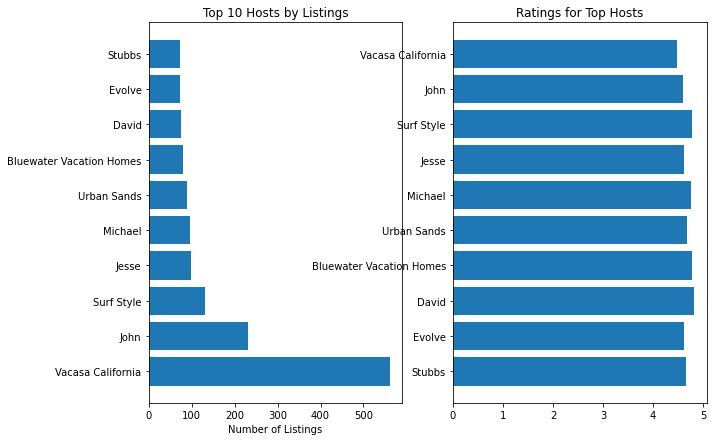

In [72]:
fig, ax = plt.subplots(1,2,figsize=(10,7))

ax.barh(hosts.index, hosts)
ax.set_title('Top 10 Hosts by Listings')
ax.set_xlabel('Number of Listings')

plt.gca().invert_yaxis()